In [ ]:
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

/home/deivith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(np.__version__)
print(pd.__version__)
print(scipy.__version__)

1.26.3
2.1.4
1.8.0


In [3]:
df = pd.read_csv("./data/dataset_part_2.csv")

In [4]:
df.head()

,FlightNumber,date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6124.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.577778,1.788889,3.500000,3.188889,-86.366477,29.449963,0.666667
std,26.124701,4732.112254,1.213172,1.595288,4.194417,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093,1.000000


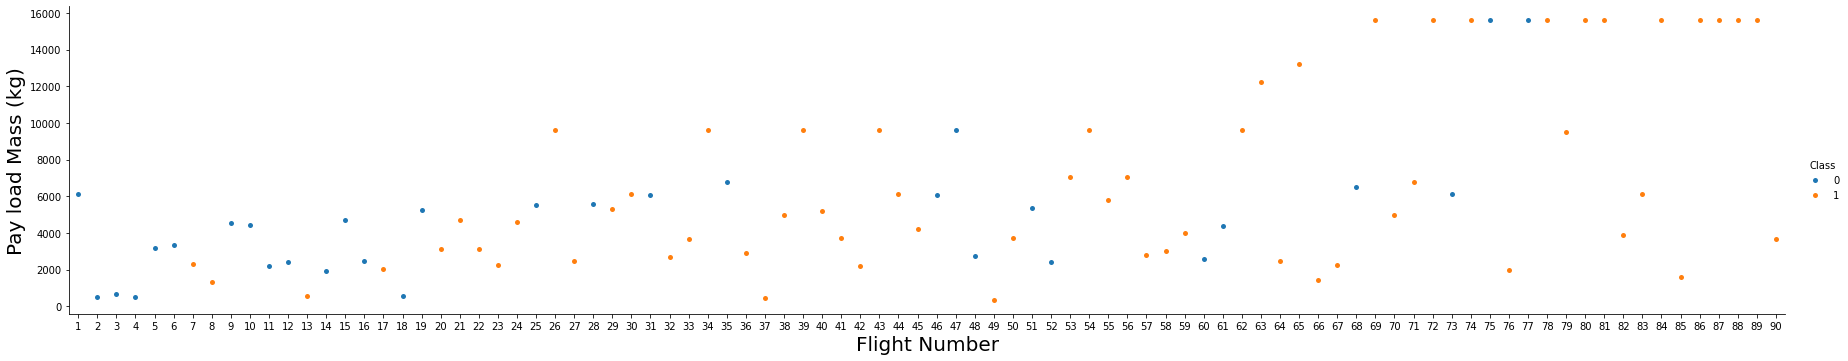

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [8]:
person,r = scipy.stats.pearsonr(df["FlightNumber"],df["PayloadMass"])
print(person,r)

0.5974861515919622 5.074842279619892e-10


In [9]:
dd = df.groupby(["LaunchSite"])["FlightNumber"]

In [10]:
d = list(dd)[2]
len(d[1])

13

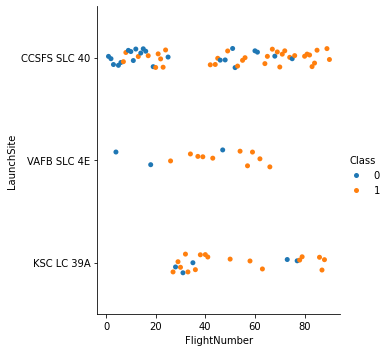

In [12]:
sns.catplot(data = df, x = "FlightNumber", y = "LaunchSite", hue="Class")

<Axes: xlabel='PayloadMass', ylabel='LaunchSite'>

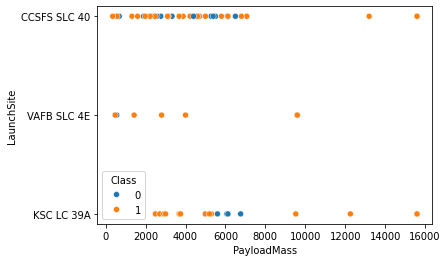

In [16]:
sns.scatterplot(data = df, y="LaunchSite", x = "PayloadMass", hue = "Class")

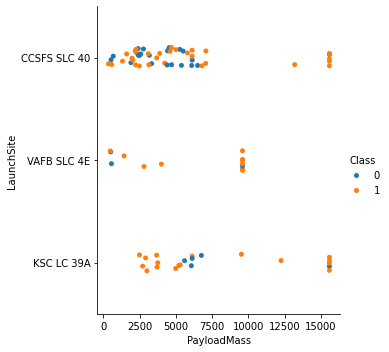

In [111]:
sns.catplot(data = df, y="LaunchSite", x = "PayloadMass", hue = "Class")

In [ ]:
#t

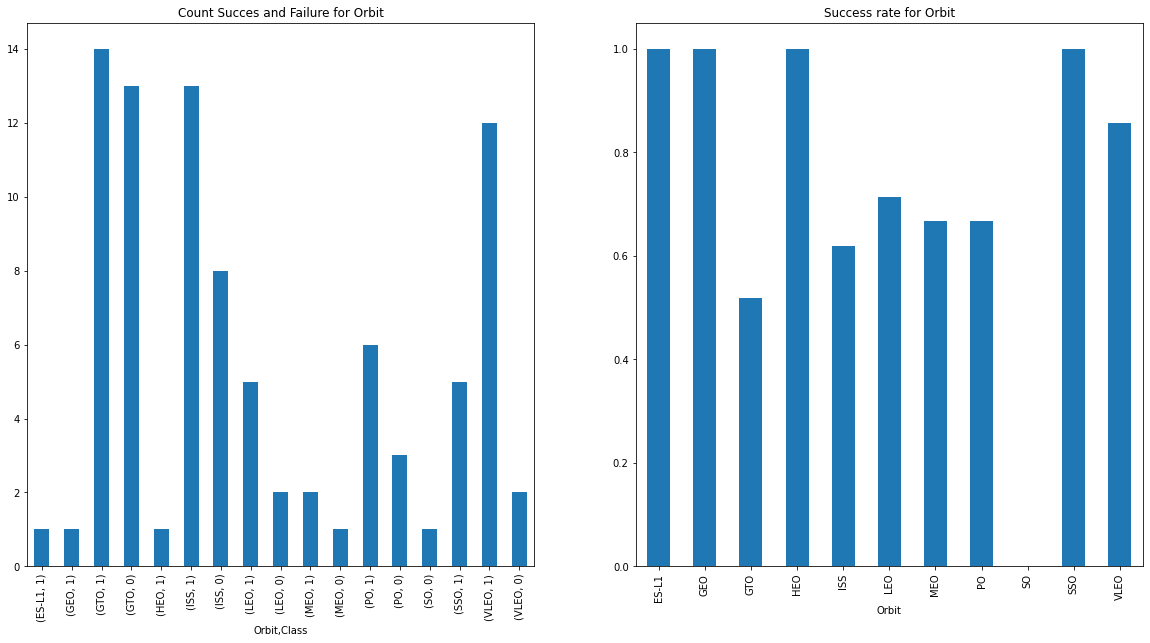

In [57]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Count Success and Failures for each Orbit
dfOrbitClass = df.groupby("Orbit")["Class"].value_counts()
dfOrbitClass.plot(kind = "bar", ax = ax1)
ax1.set_title("Count Succes and Failure for Orbit")

#Success rate for orbit 
dfRateOrbit = df.groupby("Orbit")["Class"].mean()
ax2.set_title("Success rate for Orbit")
dfRateOrbit.plot(kind = "bar", ax = ax2)

plt.show()
            



In [ ]:
#t4

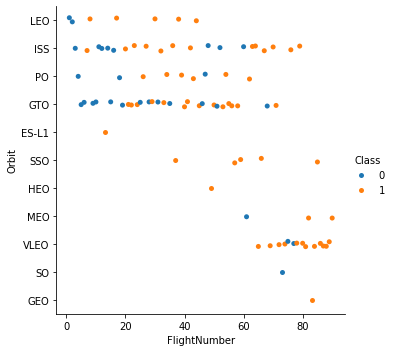

In [113]:
sns.catplot(x = "FlightNumber", y = "Orbit", hue = "Class", data = df)
plt.show()

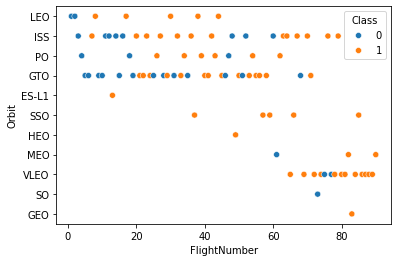

In [115]:
sns.scatterplot(x = "FlightNumber", y = "Orbit", hue = "Class", data = df)
plt.show()

In [ ]:
#t5

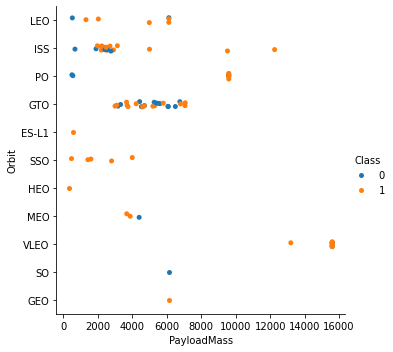

In [61]:
sns.catplot(x = "PayloadMass", y = "Orbit", hue = "Class", data = df)
plt.show()

In [ ]:
#t6

In [65]:
import datetime

In [90]:
del(df["dfSucessRateForYear"])

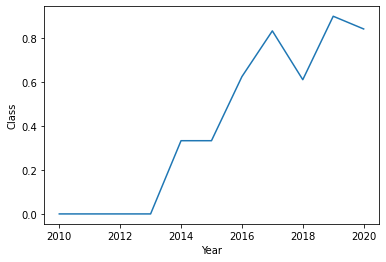

In [96]:
#dfSucessRateForYear = df.groupby("date")["Class"].mean()
df["Year"] = pd.to_datetime(df["date"]).map(lambda x : x.year)
dfSucessRateForYear = df.groupby("Year")["Class"].mean().reset_index()
#dfSucessRateForYear
sns.lineplot(x = "Year", y = "Class", data = dfSucessRateForYear)
plt.show()

In [97]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6124.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [100]:
features_one_hot = pd.get_dummies(data = features, columns=["Orbit","LaunchSite","LandingPad","Serial"])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6124.0,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.0,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.0,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.0,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.0,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.0,2,True,True,True,5.0,12,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15600.0,3,True,True,True,5.0,13,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15600.0,6,True,True,True,5.0,12,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15600.0,3,True,True,True,5.0,12,False,False,...,False,False,False,False,False,False,False,False,True,False


In [106]:
features_one_hot[["FlightNumber","PayloadMass","Flights","Block"]] = features_one_hot[["FlightNumber","PayloadMass","Flights","Block"]].astype("float64")

In [108]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object

In [109]:
features_one_hot.to_csv("./data/dataset_part_3.csv",index=False)

In [110]:
!ls data

dataset_part_1.csv  dataset_part_3.csv	spacex_web_scraped.csv
dataset_part_2.csv  Spacex.csv
